# Installation

In [0]:
!git clone https://github.com/johnhallman/tigercontrol.git

In [0]:
!pip install --quiet -e tigercontrol

In [0]:
import tigercontrol
from tigercontrol.utils.optimizers.ogd import OGD
from tigercontrol.experiments.experiment import Experiment
import jax.numpy as np
import matplotlib.pyplot as plt

# Basic Experiment

1. Create an experiment instance.

In [0]:
exp = Experiment()

2. Call help() for a description of available modules, their default initializations and how to use them.

In [3]:
exp.help()



-------------------- *** --------------------

Description: Streamlines the process of performing experiments and comparing results of controllers across
             a range of environments.

Controllers:

    initialize(environments = None, controllers = None, environment_to_controllers = None, metrics = ['mse'],
               use_precomputed = True, timesteps = 100, verbose = True, load_bar = True):

        Description: Initializes the experiment instance. 

        Args:
            environments (dict/list): map of the form environment_id -> hyperparameters for environment or list of environment ids;
                                  in the latter case, default parameters will be used for initialization

            controllers (dict/list): map of the form controller_id -> hyperparameters for controller or list of controller ids;
                                in the latter case, default parameters will be used for initialization

            environment_to_controllers (dict) 

3. Initialize a simple experiment instance.

In [0]:
exp.initialize(environments = ['ARMA-v0'], controllers =  ['PredictZero', 'LastValue'])

4. Now that we have all results stored internally, we can show a graph of the performance of the various controllers on the specified environment.

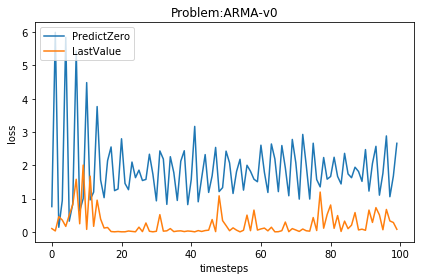

In [6]:
exp.graph()

5. Alternatively, we could show a scoreboard that contains the average loss of each controller.

In [7]:
exp.scoreboard()

Scoreboard for average mse:
+-----------------+-------------+-----------+
| Environments\Controllers | PredictZero | LastValue |
+-----------------+-------------+-----------+
|     ARMA-v0     |  1.8823036  | 0.2429869 |
+-----------------+-------------+-----------+


6. Suppose we are interested in how a new controller compares to these two 'basic' controllers. Then, we have to provide the id of the controller and the parameters we want to initialize it with and then add it to the current experiment instance and then look at the updated graph and scoreboard.

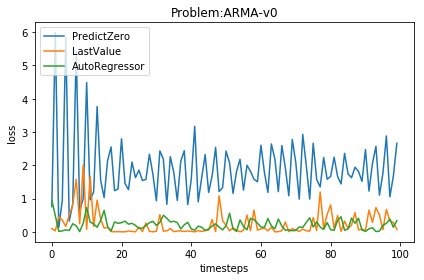

Scoreboard for average mse:
+-----------------+-------------+-----------+---------------+
| Environments\Controllers | PredictZero | LastValue | AutoRegressor |
+-----------------+-------------+-----------+---------------+
|     ARMA-v0     |  1.8823036  | 0.2429869 |   0.21497957  |
+-----------------+-------------+-----------+---------------+


In [9]:
exp.add_controller("AutoRegressor", None)
exp.graph()
exp.scoreboard()

# Running Bigger Experiments

1. If we want out environments/controllers to be initilized with specific hyperparameters, we can do so by providing dictionaries at initialization.

In [16]:
exp = Experiment()
exp.initialize(environments = {'ARMA-v0': {'p' : 4, 'q' : 0}, 'ENSO-v0': {'history' : 12, 'timeline': 6}},
               controllers =  {'LastValue' : None, 'AutoRegressor' : {'optimizer': OGD}}, metrics = ['mse'], use_precomputed = False,
               timesteps = 100, verbose = False, load_bar = False)

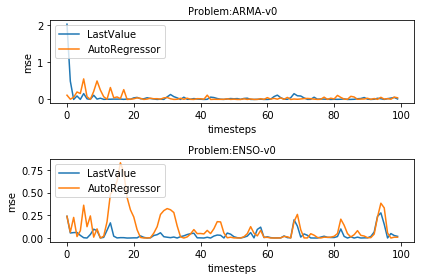

Average mse:
+-----------------+-------------+---------------+
| Environments\Controllers |  LastValue  | AutoRegressor |
+-----------------+-------------+---------------+
|     ARMA-v0     | 0.050436035 |  0.045578957  |
|     ENSO-v0     |  0.03390405 |   0.11462717  |
+-----------------+-------------+---------------+


In [17]:
exp.graph()
exp.scoreboard()